### Case Study: Fashion Class Classification

#### Step #1: Problem Statement and Business Case

#### Step #2: Importing the Data

In [1]:
# Before importing the data, we will be importing the key libraries that we'll needing
import numpy as np    # for vector and matrix operations
import pandas as pd   # for working with excel like data and data analysis
import matplotlib.pyplot as plt   # for plotting and visualization
import seaborn as sns   # for statistical visualization, more beautiful and easy version of matplotlib

In [2]:
# Data is contained in the same folder
# so we are gonna read the data using pandas
fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep=',')   # we are reading the data which is in csv format, we don't need to specifically mention to seaparater as by default the separator is comma
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep=',') # test data

In [3]:
fashion_train_df.shape, fashion_test_df.shape    # dimension of our data a.k.a number of rows and columns in our dataset

((60000, 785), (10000, 785))

In [4]:
fashion_train_df.head()   # looking at first 5 entries in our training dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()  # same goes with testing dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
### The image is represented in 28 x 28 pixels which is 784 pixels.
### Simple what is done is 28 x 28 pixels' image is flattened into a single 784 pixel value image.
### So that each row represent an image
### In total we have 60,000 training dataset and 10,000 testing dataset

#### Step #3: Visualization of the Dataset

In [7]:
### Let's try to look at these images we are talking about
### first convert this DataFrame object to numpy array
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

In [8]:
### Above we have converted our dataframe object into np array
### But as you can notice when we had looked into the first 5 rows using head(), label is also
### part of our dataset which is not part of the feature of image
### So we must remove that to plot our image
training_x = training[:, 1:]
training_x.shape

(60000, 784)

In [9]:
training_img = training_x.reshape(-1, 28, 28)    # we are reshaping our array into an actual image type

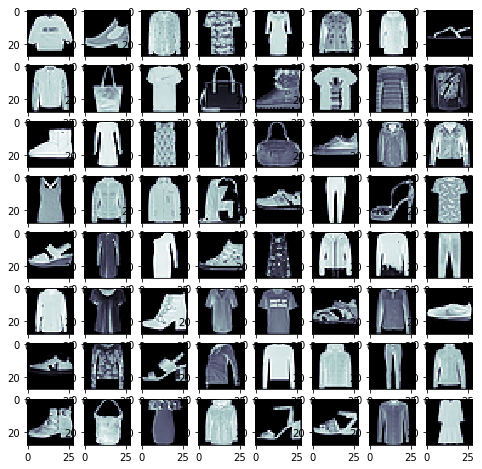

In [10]:
### Let's create a figure and plot first 64 images from training dataset
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(training_img[i, :], cmap=plt.cm.bone)
plt.show()

In [11]:
### Let's do the same we did above with testing dataset too

In [12]:
testing_x = testing[:, 1:]
testing_x.shape

(10000, 784)

In [13]:
testing_img = testing_x.reshape(-1, 28, 28)
testing_img.shape

(10000, 28, 28)

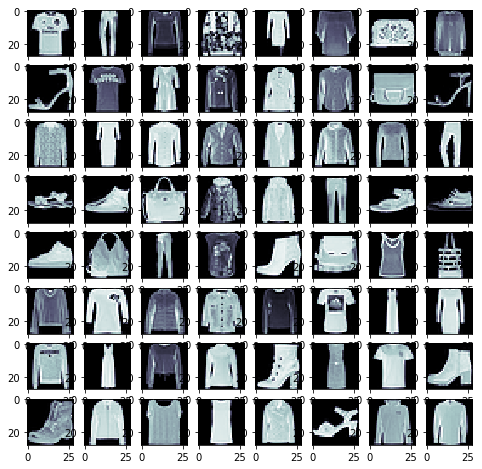

In [14]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(testing_img[i], cmap=plt.cm.bone)
plt.show()

### Step #4: Training the Model

In [15]:
X_train = training[:, 1:]/255   # select all features(pixel values) and apply normalization
y_train = training[:, 0]    # select only the labels

In [16]:
### Let's do the same for the testing dataset
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [17]:
### Split the dataset into training and test
### You might be thinking we already have separate training and test set
### Then why are we again splitting our training dataset into train and test
### It's just for validation, it's upto you. You can do it or not, totally upto you
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [18]:
### Now that we have our train, test and validation data
### We need to convert all these data into 28x28 format
### So to feed it into our convolutional layer
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
X_train.shape, X_test.shape, X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))

In [20]:
# We will be using keras library that's built on top of 
# tensorflow to build our Convolutional Neural Network
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()   # Initialize our model

In [22]:
# First we will be adding convolutional layer to the network
# In the Conv2D function we will specifying the number of convolutions to
# use which in our case is 32 followed by their dimension which is 3 x 3
# and then the input shape(i.e., which is the dimension of our input )
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """


In [23]:
# We'll be next adding our pooling layer
# We need to specify the size of the pool layer
# which will be 2 x 2 in our case
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
# Next we need to flatten our layer
# so to feed it into our feed forward 
# neural network
cnn_model.add(Flatten())

In [25]:
# Now we are adding 2 hidden layers into our network
cnn_model.add(Dense(output_dim=32, activation='relu'))
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
### That's pretty much all we need to develop our layer one by one

In [27]:
# Now we need to compile our model specifying the optimier
# Loss and metric we want to use in our network
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [28]:
# Last step we need to fit our model
epochs = 50   # how many times we want to update the weights, or say how many times we want to go through all the dataset
cnn_model.fit(X_train, y_train, batch_size=512, nb_epoch=epochs, verbose=1, validation_data=(X_validate, y_validate))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 60s 1ms/step - loss: 1.0278 - acc: 0.5652 - val_loss: 0.5503 - val_acc: 0.8030
Epoch 2/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.4771 - acc: 0.8339 - val_loss: 0.4392 - val_acc: 0.8445
Epoch 3/50
48000/48000 [==============================] - 51s 1ms/step - loss: 0.4257 - acc: 0.8521 - val_loss: 0.3966 - val_acc: 0.8628
Epoch 4/50
48000/48000 [==============================] - 52s 1ms/step - loss: 0.3935 - acc: 0.8638 - val_loss: 0.4019 - val_acc: 0.8603
Epoch 5/50
48000/48000 [==============================] - 50s 1ms/step - loss: 0.3744 - acc: 0.8684 - val_loss: 0.3699 - val_acc: 0.8725
Epoch 6/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3561 - acc: 0.8758 - val_loss: 0.3564 - val_acc: 0.8781
Epoch 7/50
48000/48000 [==============================] - 49s 1ms/step - loss: 0.3493 - acc: 0.8783 - val_loss: 0.3603 - val_acc

### Step #5: Evaluating The Model

In [32]:
evaluation = cnn_model.evaluate(X_test, y_test)
# evalute method returns loss and accuracy
# we just want to have a look at accuracy only
print("Test Accuracy: ",evaluation[1])

10000/10000 [==============================] - 6s 612us/step
Test Accuracy:  0.909


In [33]:
predict_classes = cnn_model.predict_classes(X_test)

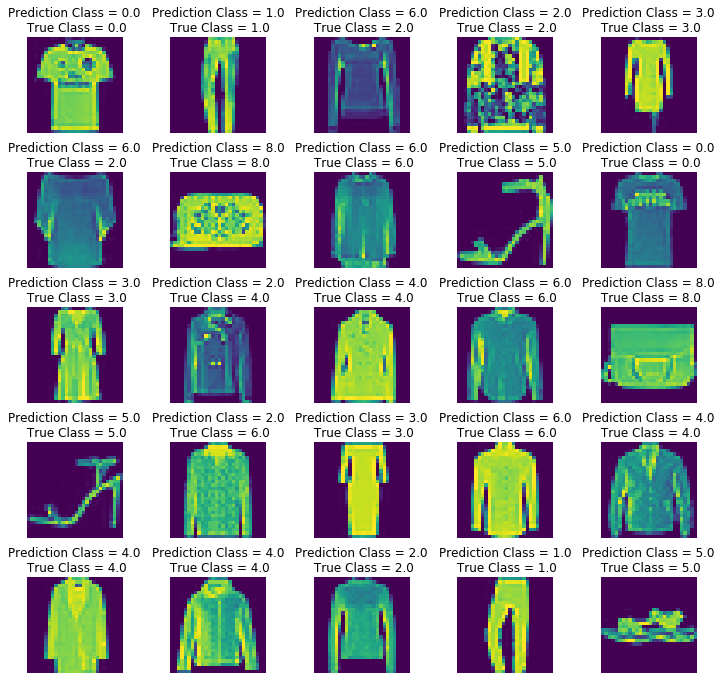

In [34]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

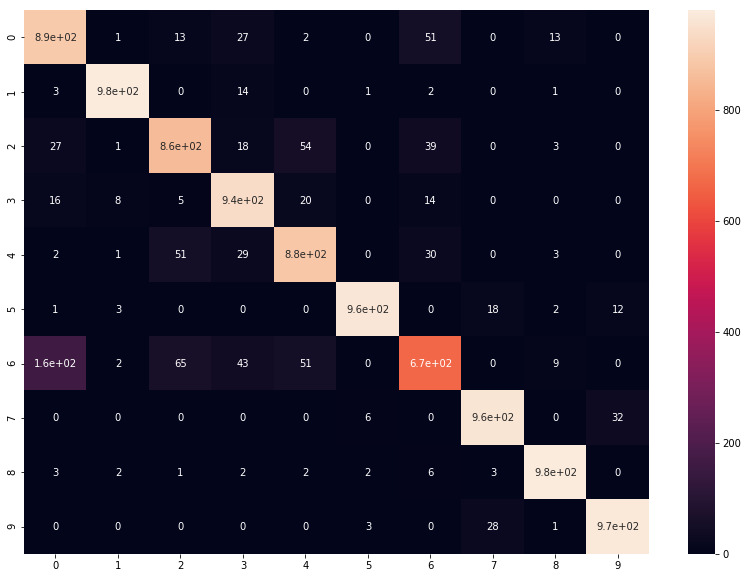

In [35]:
# Let's check out our confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)
# sum the diagonal elements to get the total true correct values